In [1]:
#import librares 
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn.feature_selection as fs
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif


In [2]:
pip install skfeature-chappers

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install git+https://github.com/jundongl/scikit-feature.git

In [4]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [5]:
import category_encoders as ce

In [6]:
df = pd.read_csv('bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.shape

(45211, 17)

In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [10]:
obj_datatype = df.columns[df.dtypes == 'object'].tolist()
for obj_to_category in obj_datatype:
    df[obj_to_category] = df[obj_to_category].astype('category')
    

In [11]:
df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [12]:
#checking the count of unknown in these encoder
columns = ['job','education','contact','poutcome']

output = [len(df[df[x] == 'unknown']) for x in columns]
output

[288, 1857, 13020, 36959]

In [13]:
 df = df[(df.job != 'unknown')&(df.education!= 'unknown')]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,15.809414,258.323409,2.758178,40.404070,0.584863
std,10.512640,3042.103625,8.305970,258.162006,3.063987,100.420624,2.332672
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,442.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


<AxesSubplot:>

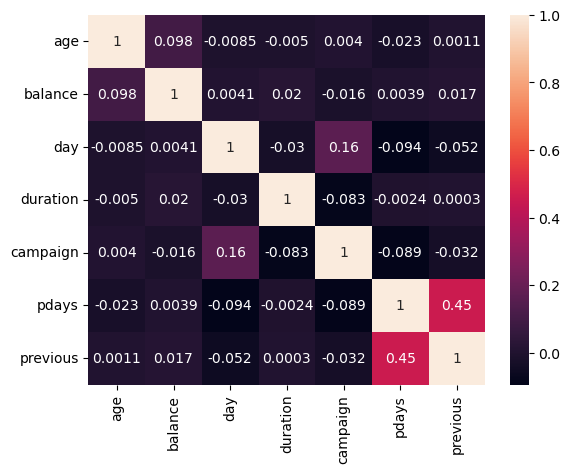

In [15]:
sns.heatmap(df.corr(), annot= True)

In [16]:
#using label encoder to encode these column
categ = df.loc[:, ['default', 'housing','loan','y']]
categ = ['default','housing','loan','y']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5508\111292576.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categ] = df[categ].apply(le.fit_transform)


In [17]:
from category_encoders import OrdinalEncoder

mapping = [{'col': 'education', 'mapping': {"tertiary": 1,  "secondary": 2, "primary": 3}}]
data_encoded = OrdinalEncoder(cols=['education'], mapping=mapping).fit(df).transform(df)
data_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,1,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,1,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,1,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,1,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,3,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,2,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,2,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [18]:
dummies = pd.get_dummies(df.marital,prefix= 'marital')
df_2 = pd.concat([data_encoded, dummies], axis = 'columns')
df_2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_divorced,marital_married,marital_single
0,58,management,married,1,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,0,1,0
1,44,technician,single,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,0,0,1
2,33,entrepreneur,married,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,0,1,0
5,35,management,married,1,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0,0,1,0
6,28,management,single,1,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,1,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,0,1,0
45207,71,retired,divorced,3,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,1,0,0
45208,72,retired,married,2,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,0,1,0
45209,57,blue-collar,married,2,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0,0,1,0


In [19]:
#OneHotEncoder(cols = ['job'].fit(df).transform(df)data = df
#encoder = ce.BinaryEncoder(cols = ['job'],return_df= True)
#data_encoded=encoder.fit_transform(data) 
#data_encoded

In [20]:
from category_encoders import OneHotEncoder
import category_encoders as ce
df_3=ce.OneHotEncoder(cols=['job','month'],use_cat_names=True).fit(df_2).transform(df_2)


In [21]:
df_4=ce.OneHotEncoder(cols=['contact','poutcome'],handle_unknown='ignore',use_cat_names=True).fit(df_3).transform(df_3)
df_4
#one_hot = pd.get_dummies([['contact','poutcome']], prefix =['contact','poutcome'])
#df = pd.concat([df_2, one_hot], axis = 1)
#df

,age,job_management,job_technician,job_entrepreneur,job_retired,job_admin.,job_services,job_blue-collar,job_self-employed,job_unemployed,...,pdays,previous,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,y,marital_divorced,marital_married,marital_single
0,58,1,0,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,1,0
1,44,0,1,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,0,1
2,33,0,0,1,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,1,0
5,35,1,0,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,1,0
6,28,1,0,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,1,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,1,0,1,0
45207,71,0,0,0,1,0,0,0,0,0,...,-1,0,1,0,0,0,1,1,0,0
45208,72,0,0,0,1,0,0,0,0,0,...,184,3,0,0,0,1,1,0,1,0
45209,57,0,0,0,0,0,0,1,0,0,...,-1,0,1,0,0,0,0,0,1,0


In [22]:
df_4.drop(['marital'], axis=1,inplace=True)



In [23]:
df_4

,age,job_management,job_technician,job_entrepreneur,job_retired,job_admin.,job_services,job_blue-collar,job_self-employed,job_unemployed,...,pdays,previous,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,y,marital_divorced,marital_married,marital_single
0,58,1,0,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,1,0
1,44,0,1,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,0,1
2,33,0,0,1,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,1,0
5,35,1,0,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,1,0
6,28,1,0,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,1,0,0,0,0,0,0,0,...,-1,0,1,0,0,0,1,0,1,0
45207,71,0,0,0,1,0,0,0,0,0,...,-1,0,1,0,0,0,1,1,0,0
45208,72,0,0,0,1,0,0,0,0,0,...,184,3,0,0,0,1,1,0,1,0
45209,57,0,0,0,0,0,0,1,0,0,...,-1,0,1,0,0,0,0,0,1,0


In [24]:
features = df_4.drop(['y','pdays','balance'], axis = 1)
target = df_4['y']

#chi_scores,p_value = chi2(features,target)
#result = pd.DataFrame({'Feature': features.columns,'Chi-Squared':chi_scores,'P-Value':p_values})
#print(result)

In [25]:
chi_scores,pvals = chi2(features,target)
results = pd.DataFrame({'Feature': features.columns,'Chi-Squared':chi_scores,'P-Value': pvals})
results.sort_values(by='Chi-Squared', ascending=False, inplace=True)
print(results)

              Feature   Chi-Squared        P-Value
32           duration  1.759804e+06   0.000000e+00
38   poutcome_success  3.860117e+03   0.000000e+00
34           previous  3.383801e+03   0.000000e+00
29          month_mar  7.754938e+02  1.148810e-170
33           campaign  7.719888e+02  6.642638e-170
16    contact_unknown  6.708731e+02  6.452562e-148
24          month_oct  6.630143e+02  3.302147e-146
31          month_sep  6.546756e+02  2.149146e-144
14            housing  3.615176e+02   1.315614e-80
20          month_may  3.074618e+02   7.801384e-69
17   contact_cellular  2.692267e+02   1.672780e-60
4         job_retired  2.541490e+02   3.235629e-57
26          month_dec  2.367886e+02   1.972222e-53
11        job_student  2.320011e+02   2.182407e-52
35   poutcome_unknown  2.125814e+02   3.755786e-48
19                day  1.724400e+02   2.169054e-39
7     job_blue-collar  1.708376e+02   4.855414e-39
15               loan  1.708219e+02   4.893841e-39
30          month_apr  1.598362

In [26]:
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(features,target)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(features.columns)
f_Scores = pd.concat([df_columns,df_scores],axis=1)               
f_Scores.columns = ['Specs','Score']  

f_Scores

,Specs,Score
0,age,7.178937e+01
1,job_management,3.486279e+01
2,job_technician,1.909764e+00
3,job_entrepreneur,1.590952e+01
4,job_retired,2.541490e+02
5,job_admin.,1.965163e+00
6,job_services,3.240174e+01
7,job_blue-collar,1.708376e+02
8,job_self-employed,5.619290e-02
9,job_unemployed,1.902722e+01


In [27]:
#pip install scikit-feature

In [28]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

# Select the top 5 features using recursive feature elimination
#estimator = LogisticRegression()
#selector = RFE(estimator, n_features_to_select=5, step=1)
#X_train_selected = selector.fit_transform(features, target)
#X_test_selected = selector.transform(features)


In [29]:
#from skfeature.function.similarity_based import fisher_score

#ranks = fisher_score.fisher_score(features, target)

#feat_importance = pd.Series(ranks, df_4.columns[0:len(df_4.columns)-1])
#feat_importance.plot(kind='barh',color='teal')
#plt.show()

from sklearn.feature_selection import mutual_info_classif
x= df_4.drop(['y'], axis = 1)
y = df_4['y']

mi_scores = mutual_info_classif(x, y, discrete_features=True)
results = pd.DataFrame({'Feature': x.columns, 'Mutual Information': mi_scores})
results.sort_values(by='Mutual Information', ascending=False, inplace=True)

print(results)


              Feature  Mutual Information
14            balance        9.698663e-02
33           duration        9.310905e-02
35              pdays        3.335571e-02
40   poutcome_success        2.727093e-02
17    contact_unknown        1.290939e-02
36           previous        1.247736e-02
0                 age        1.246983e-02
37   poutcome_unknown        1.153441e-02
18   contact_cellular        9.961136e-03
15            housing        9.504472e-03
20                day        5.976897e-03
21          month_may        5.607226e-03
30          month_mar        5.535507e-03
25          month_oct        5.130558e-03
32          month_sep        4.887582e-03
34           campaign        4.486051e-03
7     job_blue-collar        2.770725e-03
16               loan        2.675113e-03
12          education        2.641190e-03
4         job_retired        2.543277e-03
11        job_student        2.050358e-03
43     marital_single        1.968002e-03
42    marital_married        1.827

In [30]:
#from sklearn.feature_selection import SelectKBest, mutual_info_classif
#selector = SelectKBest(mutual_info_classif, k=10)
#X_new = selector.fit_transform(features, target)

from sklearn.feature_selection import f_classif


f_scores, p_values = f_classif(x,y)
f_scores_df = pd.DataFrame({'feature_name': x.columns, 'f_score': f_scores})
f_scores_df.sort_values(by='f_score', ascending=False, inplace=True)
print(f_scores_df)

#for i in range(len(f_scores)):
   # print(f"Feature {i}: F-score={f_scores[i]}, p-value={p_values[i]}")


         feature_name      f_score
33           duration  8099.917822
40   poutcome_success  4397.974589
37   poutcome_unknown  1193.280769
17    contact_unknown   958.313218
15            housing   842.219174
30          month_mar   798.064043
18   contact_cellular   790.452813
25          month_oct   684.423068
32          month_sep   673.138968
35              pdays   449.114905
21          month_may   447.221228
36           previous   366.787317
4         job_retired   269.083387
27          month_dec   239.196496
11        job_student   237.528124
34           campaign   228.000628
7     job_blue-collar   218.664408
12          education   218.335185
16               loan   205.427640
43     marital_single   178.105319
31          month_apr   171.672297
42    marital_married   160.934378
14            balance   114.349702
29          month_feb    62.401136
23          month_jul    57.311463
1      job_management    44.362520
39     poutcome_other    43.132628
20                da

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the number of features to keep
k = 10

# SelectKBest with f_classif
selector = SelectKBest(f_classif, k=k)

# Fit selector to the training data
X_train_selected = selector.fit_transform(x, y)

# Get the p-values and feature names
p_values = selector.pvalues_
feature_names = x.columns

# Create a dictionary of feature names and their corresponding p-values
p_values_dict = dict(zip(feature_names, p_values))

# Sort the features by their p-values in ascending order
sorted_p_values = sorted(p_values_dict.items(), key=lambda x: x[1])

# Print the feature names and their corresponding p-values
for feature, p_value in sorted_p_values:
    print(f"{feature}: {p_value}")


duration: 0.0
poutcome_success: 0.0
poutcome_unknown: 5.839189905618514e-258
contact_unknown: 3.939324340089796e-208
housing: 2.0778342739892737e-183
month_mar: 5.477091857658258e-174
contact_cellular: 2.3094106418906538e-172
month_oct: 1.0758082664510513e-149
month_sep: 2.8033470957537055e-147
pdays: 3.601950425083631e-99
month_may: 9.213517278328983e-99
previous: 2.0409073049764494e-81
job_retired: 2.737096384447033e-60
month_dec: 8.211104221435856e-54
job_student: 1.888837484022171e-53
campaign: 2.2016145047948833e-51
job_blue-collar: 2.3366808706746548e-49
education: 2.7545595871487524e-49
loan: 1.7468395118237252e-46
marital_single: 1.5119312877373512e-40
month_apr: 3.790345666511808e-39
marital_married: 8.227214002993305e-37
balance: 1.1796847528430807e-26
month_feb: 2.8674700190921935e-15
month_jul: 3.793637663115462e-14
job_management: 2.7612560380104853e-11
poutcome_other: 5.1731071330859575e-11
day: 3.2260917120148817e-10
job_services: 2.2723138954209883e-09
age: 2.6532188655

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
x= df_4.drop(['y'], axis = 1)
y = df_4['y']

# assume X contains your feature matrix and y contains the target variable
selector = SelectKBest(mutual_info_classif, k=30) # select top 30 features
x_new = selector.fit_transform(x, y)

# get the indices of the selected features
selected_features = selector.get_support(indices=True)

# get the names of the selected features
feature_names = x.columns[selected_features]

# print the names of the selected features
print(feature_names)

Index(['age', 'job_management', 'job_retired', 'job_blue-collar',
       'job_unemployed', 'job_student', 'education', 'balance', 'housing',
       'loan', 'contact_unknown', 'contact_cellular', 'contact_telephone',
       'day', 'month_may', 'month_oct', 'month_dec', 'month_jan', 'month_feb',
       'month_mar', 'month_apr', 'month_sep', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome_unknown', 'poutcome_success', 'marital_married',
       'marital_single'],
      dtype='object')


In [33]:
#from skfeature.function.similarity_based import fisher_score
#scores = fisher_score.fisher_score(x, y)
#for i, score in enumerate(scores):
    #print(f"Feature {i}: {score}")

##ranks = fisher_score.fisher_score(x,y)

#feat_importance = pd.Series(ranks, df_4.columns[0:len(df_4.columns)-1])
#feat_importance.plot(kind='barh',color='teal')
#plt.show()


In [34]:
cols_to_drop = ['job_housemaid','month_nov','month_jun','contact_telephone','poutcome_failure','month_aug','month_jan','job_technician','job_admin.','marital_divorced','job_self-employed','job_entrepreneur','job_unemployed']

X = df_4.drop(cols_to_drop, axis = 1)
y = df_4['y']

In [35]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



In [36]:
#models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]
#cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
#for model in models:
    # Fit model on training data
    #model.fit(X, y)
    #mean_score = scores.mean()
    #std_score = scores.std()
    
    # Print results
    #print(f"Model: {type(model).__name__}, Mean accuracy: {mean_score:.3f}, Std accuracy: {std_score:.3f}")

# Select best model based on mean accuracy
#best_model = max(models, key=lambda model: cross_val_score(model, X, y, cv=cv).mean())
#print(f"Best model: {type(best_model).__name__}")

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'scores' is not defined

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LR: 0.950321 (0.020714)
RF: 1.000000 (0.000000)
SVM: 0.883909 (0.004451)


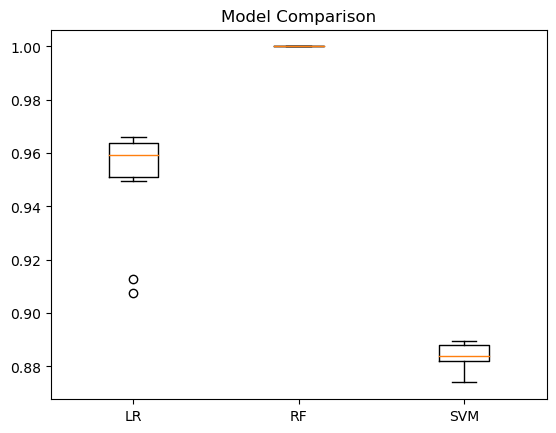

In [37]:

# define models to test
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=42)

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# plot model performance for comparison
plt.boxplot(results, labels=names)
plt.title('Model Comparison')
plt.show()


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# assume X and y are the feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest classifier object
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf_clf.predict(X_test)

# calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix
confusion_matrix = cm(y_test, y_pred)
print('confusion_matrix:', confusion_matrix)

confusion_matrix: [[7658    0]
 [   0  981]]


In [42]:
from sklearn.metrics import classification_report
cr = classification_report
classification_report = cr(y_test, y_pred)
print('classification_report:', classification_report)

classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7658
           1       1.00      1.00      1.00       981

    accuracy                           1.00      8639
   macro avg       1.00      1.00      1.00      8639
weighted avg       1.00      1.00      1.00      8639

